In [1]:
# Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

## Lab Assignment Eight: Recurrent Network Architectures

________________________________________________________________________________________________________
* Name1: Simin Wang
* Name2: Yibo Tang
* Name3: Jingzhen Hu

## Contents
* <a href="#PO">1. Preparation</a>
 * 1.1 Business Understanding
 * 1.2 Data Understanding and Pre-processing
 * 1.3 Metric Selection
 * 1.4 Data Splitting
 
 
* <a href="#Modeling">2. Modeling</a>
 * 2.1 Parameters Tuning for LSTM and GRU
 * 2.2 Comparison of Different Recurrent Networks


* <a href="#ExceptionalWork">3. Exceptional Work</a>
 
 
* <a href="#References">References</a>
<a id="Loading"></a>

<a id="PO"></a>
## 1. Preparation

### 1.1 Business Understanding


#### Overview

This Dataset is scraped from https://www.thenews.com.pk website. It has news articles from 2015 till date related to business and sports. It Contains the Heading of the particular Article, its content and its date. The content also contains the place from where the statement or Article was published.

This dataset includes 2692 news documents in total which are labeled as "text", "heading" and "Type of Article". Text has the news article and the place where it was published from; Heading has text containing the heading of the news article; Type of Article has the type of articles: business or sports in this case. Words frequencies can be obtained from the text part, with which we will be able to predict which type a certain article belongs to.

#### Motivations(Why our model is important)

We now live in an era of information explosion and the digital revolution has changed the world a lot. According to MarketingProfs(http://www.marketingprofs.com/articles/2015/27698), more than 2 million news and articles are published every day on the web. Figuring out desired articles with a certain type is always a tough but necessary part of commercial activities. 

Our targeted customer, the stockbroker, one of whose main duties are stock of sports industries, collects thousands of news from relative fields and attempts to select business news for further analysis. For example, stockbrokers care more about the emergent or unexpected factors that leads to the negative or positive influence of a sports company like NBA rather than whether DAL wins LAL in a preseason match. They need business news since they have to assess the ability of management staff such that whether they can promote the popularity of the brand to more countries and they have a long-term sight or not. Sports news, definitely, could reveal the current success of the sports company if the matches, leagues or tournaments it organizes achieve a great attention and audience. 

Stockbrokers really need both types of information to conduct detailed analysis and then provide professional helps for the client institutions or investors, thus making their investments worthwhile in sports field. However, extracting news from websites like Yahoo, many of the news are not clearly classified and in some cases even without categorical tags, which brings a lot of inconvenience in data collection. Business news are very likely to get mixed up with lots of sports news. A strong desire emerges, which is to develop a method to tell business news and sports news apart and then select business news from those articles. Our model (or algorithm) after carefully training will be competent for this job.

Furthermore, since our final goal is to select limited articles for manually analysis from tens of thousands of text documents, multi-time classifications will be needed with similar algorithm or model in practice. Also we could also make prediction on different datasets about different features and do nominal classification and even multinomial classifications.

#### Business target (How well would your prediction algorithm need to perform to be considered useful?)

Traditional way to do feature extraction on text data and select desired articles depends on manually operation. A high precision (nearly 100%) is guaranteed in this way but at a high cost of time and human resource. 

The success of our trained model, or in other way, the f1_score is measured to evaluate the learning outcome. Suppose we have a nicely trained algorithm; we will expect the response rate (f1_score) to be close to 100%. In the real project, we rarely have 100% success predictions, but we are to get it as close as we can. 

Community who uses our model and looks at the 95% overall success rate on identifying different classes of texts will consider the accuracy is "close" enough for manually selection. Any accuracies adjacent to this value will indicate that the algorithm is practically sound and useful.

### 1.2 Data Understanding and Pre-processing

In [2]:
import pandas as pd
import numpy as np

# read data from csv repository
print('************************************************************')
df_category = pd.read_csv('Articles.csv',encoding="ISO-8859-1")

print('The categories include: \n', set(df_category['NewsType']))
print('************************************************************')

# then we show statistics of our dataset groupby classes
df_category.groupby(['NewsType']).size().reset_index(name='counts')

************************************************************
The categories include: 
 {'sports', 'business'}
************************************************************


,NewsType,counts
0,business,1284
1,sports,1408


In [3]:
df_category.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


We remove stopwords here and make our content of articles into a string list in order to convert them into a bad of word and to compute tf-idf later.

In [4]:
import nltk
import re
from nltk.corpus import stopwords

summary_text = []
for index in range(0,df_category['Article'].count()):
    voc = re.sub('[^a-zA-Z]+', ' ', df_category["Article"][index]).lower()
    
    for word in stopwords.words('english'): # iterate over word_list
        voc = re.sub('\s{0}\s'.format(word), ' ', voc) 
    df_category["Article"][index] = voc
    summary_text.append(voc)

summary_text[0:3] # print the first three articles

['karachi sindh government decided bring public transport fares per cent due massive reduction petroleum product prices federal government geo news reported sources said reduction fares applicable public transport rickshaw taxi means traveling meanwhile karachi transport ittehad kti refused abide government decision kti president irshad bukhari said commuters charged lowest fares karachi compare parts country adding pc vehicles run compressed natural gas cng bukhari said karachi transporters cut fares decrease cng prices made ',
 'hong kong asian markets started upswing limited trading friday mainland chinese stocks surging hong kong speculation beijing may ease monetary policy boost slowing growth hong kong rose percent closing points higher seoul closed percent rising points sydney gained percent points close singapore edged percent gaining points markets mainland china japan taiwan new zealand philippines thailand remained closed holidays mainland bourses shut january shares chinese

In [5]:
categories = ['business', 'sports']
df = df_category.copy()

#Convert NewType to numeric type: 0 represents business, 1 represents sports
df_category.NewsType.replace(to_replace = categories,
                 value = range(0,2), inplace = True)

In [6]:
df_category.head()

,Article,Date,Heading,NewsType
0,karachi sindh government decided bring public ...,1/1/2015,sindh govt decides to cut public transport far...,0
1,hong kong asian markets started upswing limite...,1/2/2015,asia stocks up in new year trad,0
2,hong kong hong kong shares opened percent lowe...,1/5/2015,hong kong stocks open 0.66 percent lower,0
3,hong kong asian markets tumbled tuesday follow...,1/6/2015,asian stocks sink euro near nine year,0
4,new york us oil prices monday slipped barrel f...,1/6/2015,us oil prices slip below 50 a barr,0


In [7]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [8]:
NUM_TOP_WORDS = None
MAX_ART_LEN = 200 # maximum and minimum number of words

tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(summary_text)
sequences = tokenizer.texts_to_sequences(summary_text)

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

X = pad_sequences(sequences, maxlen=MAX_ART_LEN)

y_ohe = keras.utils.to_categorical(df_category.NewsType)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y_ohe.shape)
print(np.max(X))

Found 25423 unique tokens. Distilled to 25423 top words.
Shape of data tensor: (2692, 200)
Shape of label tensor: (2692, 2)
25423


### 1.3 Metric Selection

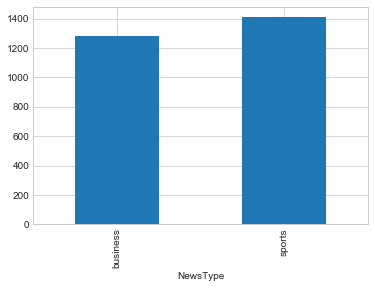

In [9]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

df.groupby(['NewsType']).NewsType.count().plot(kind = 'bar')
plt.show()

As illustrated from the above figure, our text dataset doesn't suffer greatly by the class imbalance problems. There are only 124 instances deficiency between business and sports when they both have over 1000 instances.

However, we do care about the false negatives of our dataset. For example, when our model fails to recognize all the articles of sports and business, it's highly possible that stockbrokers miss some important clues that affect the final decision. Therefore, it could bring severe consequences, such as investment failure, thus losing customers and damaging their reputation. On the other hand, the false positives could affect the overall performance when both categories are misclassified for each other, especially when they try to reach the 95% precision target. Consequently, the precision and recall measure are indispensable to our evaluation metrics.

Considering the necessity of precision and recall, we should not use the normal accuracy as evaluation metric (the cost of misclassification for the small sized target class will be overlooked). F1 score considers both the precision and recall. As the higher precision, the lower false positive. As the higher the recall, the lower the false negative. Then, to minimize the both the false postive and false negative, we need a higher F1 score which is built to treat the precision and recall equally in the following equation.
$$F_1 = \frac{2rp}{r+p}$$
Thus, F1 score is a better choice for the dataset than the accuracy. 
Inside the F1 score measurement, there are two different ways (for nonbinary classification case) to deal among k classes - micro and macro options. As our case only involves two classes, the result of macro and micro f1 scores should be the same. Due to no difference, we just choose the 'binary' option to use the standard f1 function later in the test phrase.

In conclusion, macro f1 measure that takes both precision and recall into account should be our evaluation metric.

In [10]:
from keras import backend as K
def f1_score(y_true, y_pred):
    
    # Count positive samples.
    y_true_clipped = K.cast(x=K.clip(y_true, 0, 1)>0.5,dtype='float32')
    y_pred_clipped = K.cast(x=K.clip(y_pred, 0, 1)>0.5,dtype='float32')
    a = K.sum(y_true_clipped*y_pred_clipped,axis=1)
    b = K.sum(y_true_clipped*(1-y_pred_clipped),axis=1)
    c = K.sum((1-y_true_clipped)*y_pred_clipped,axis=1)
    
    
    return K.mean(2*a/(2*a+b+c))

### 1.4 Data Splitting

Since our case does not suffer the imbalance, ShuffleSplit cross-validator is a great choice. This cross-validation object returns randomized folds. Since the number of news in each classes are similar, the folds are not necessarily to be made by preserving the percentage of samples for each class. Suffling splits can avoid the situation that the data is ordered by the types, which will lead to one fold consist of only one type of news. In addition, we would like to see the generalized overall performance of our dataset rather than one-time randomized split. Meanwhile, as the text dataset is not as big as the image one, we choose the fold number to be as usual as 10. 

Note: here to choose SuffleSplit is corresponding to the specific dataset we have. If we would like to have a more generalized model (possible to deal with imbalance classes), the SatifiedShuffleSplit is a good option. However, the Satified process (preserving the percentage of samples for each class) will be an extra/redundant operation (inefficient) in our specific balanced dataset. 

In [11]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers.embeddings import Embedding
from sklearn import metrics as mt
from sklearn.metrics import f1_score as f1

NUM_CLASSES = 2

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
    
# split our data into train and test sets using StratifiedShuffleSplit
cv_outerloop = StratifiedShuffleSplit(n_splits = 10, test_size  = 0.2, random_state = 42)

for train_index, test_index in cv_outerloop.split(X, y_ohe):
    X_train, X_test = X[train_index], X[test_index]
    y_train_ohe, y_test_ohe = y_ohe[train_index], y_ohe[test_index]

print('The shape of X_train:',X_train.shape)
print('The shape of X_test:',X_test.shape)
print('The shape of X:',X.shape)

The shape of X_train: (2153, 200)
The shape of X_test: (539, 200)
The shape of X: (2692, 200)


<a id="Modeling"></a>
## 2. Modeling

### 2.1 Parameters Tuning for LSTM and GRU

In [13]:
%%time
EMBED_SIZE = 100
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('glove.6B/glove.6B.100d.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

Found 400000 word vectors.
(25424, 100)
CPU times: user 12.7 s, sys: 350 ms, total: 13 s
Wall time: 13.2 s


In [31]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],
                            input_length=MAX_ART_LEN,
                            trainable=False)

In [61]:
def plot_filled(test_scores, train_x_axis, xlabel=''):
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_x_axis, test_mean,
             color='blue', marker='o',
             markersize=5, label='Linear F1_score')

    plt.fill_between(train_x_axis,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='blue')

    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('F1_score')
    plt.legend(loc='lower right')
    plt.tight_layout()

#### LSTM

In [59]:
def create_LSTM(embedding_layer, size = 100, drop = 0.2, re_drop = 0.2):
    rnn = Sequential()
    rnn.add(embedding_layer)
    rnn.add(LSTM(units = size, dropout = drop, recurrent_dropout = re_drop))
    rnn.add(Dense(NUM_CLASSES, activation='sigmoid'))
    rnn.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=[f1_score])
    return rnn

print(create_LSTM(embedding_layer).summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 100)          2542400   
_________________________________________________________________
lstm_20 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 202       
Total params: 2,623,002
Trainable params: 80,602
Non-trainable params: 2,542,400
_________________________________________________________________
None


In [53]:
val_scores = []
for drop in np.arange(0.1, 0.9, 0.1):
    rnn_lstm = create_LSTM(embedding_layer, drop = drop, re_drop = drop)

    history = rnn_lstm.fit(X_train, y_train_ohe, epochs = 5, 
                       batch_size=64, validation_data=(X_test, y_test_ohe), verbose = 0)
    val_scores.append(history.history.get('val_f1_score'))

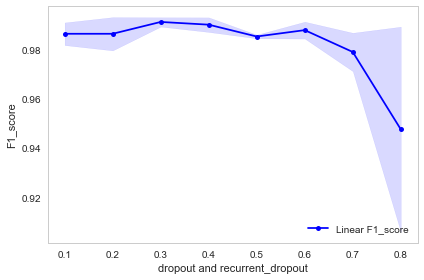

In [69]:
plot_filled(val_scores, np.arange(0.1, 0.9, 0.1), 'dropout and recurrent_dropout')

We compare 8 different values of dropout and recurrent_dropout for the LSTM, change them synchronously based on their results evaluated by our selected f1 metric. According to the curve, the best parameter values of dropout and recurrent_dropout is 0.3 (high f1 score around 0.99 with a low variance around 0.0001). The dropout value 0.6 looks like a threshold that less than - a relatively stable (low variance) with high f1 scores. A more appropriate interval for both the dropout value and recurrent_dropout is between 0.3 and 0.6. The existence of dropout aims to reduce the probability of overfitting and enhance the efficiency. Then, a middle range of the dropout give a good usage of training data. We choose a fixed dropout values - 0.3 and tune the next parameter - a number of rows(neurons).

In [60]:
val_scores2 = []
for size in np.arange(60, 140, 20):
    rnn_lstm = create_LSTM(embedding_layer, size = size, drop = 0.3, re_drop = 0.3)

    history = rnn_lstm.fit(X_train, y_train_ohe, epochs = 5, 
                       batch_size=64, validation_data=(X_test, y_test_ohe), verbose = 0)
    val_scores2.append(history.history.get('val_f1_score'))

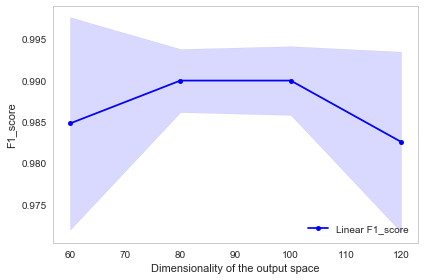

In [70]:
plot_filled(val_scores2, np.arange(60, 140, 20), 'Dimensionality of the output space')

The tuning curve of the dimensionality of the out space shows that a reasonable interval is between 80 and 100 with a high f1 score around 0.99 and variance around 0.005 - stable bands wrap a segment. The complement of the interval has a similar pattern - low and unstable f1 score. Thus, we choose the value 80 since it is a slightly stable (narrower band) variance in the plot.

#### GRU

In [16]:
def create_GRU(embedding_layer, size = 100, drop = 0.2, re_drop = 0.2):
    rnn = Sequential()
    rnn.add(embedding_layer)
    rnn.add(GRU(units = size, dropout = drop, recurrent_dropout = re_drop))
    rnn.add(Dense(NUM_CLASSES, activation='sigmoid'))
    rnn.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=[f1_score])
    return rnn

print(create_GRU(embedding_layer).summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          2542400   
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               60300     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 2,602,902
Trainable params: 2,602,902
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
val_scores3 = []
for drop in np.arange(0.1, 0.9, 0.1):
    rnn_gru = create_GRU(embedding_layer, drop = drop, re_drop = drop)

    history = rnn_gru.fit(X_train, y_train_ohe, epochs = 5, 
                       batch_size=64, validation_data=(X_test, y_test_ohe), verbose = 0)
    val_scores3.append(history.history.get('val_f1_score'))

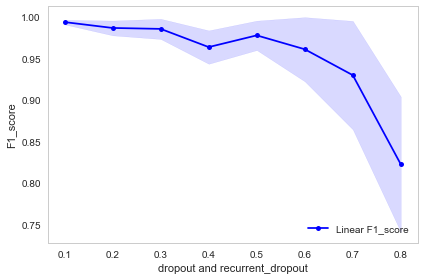

In [73]:
plot_filled(val_scores3, np.arange(0.1, 0.9, 0.1), 'dropout and recurrent_dropout')

Same procedure for the GRU but the curve has a totally different pattern. With a smaller dropout values, the result has a higher f1 score with a low variance. The result shows that it is not quite necessary to include the dropout - possible because the original model does not involve much overfitting, it needs the data. However, with the 0.1 dropout, the f1 score approaches to 1 closely with a nearly zero variance - perfect. We choose 0.1 and tune the number of neurons.

In [74]:
val_scores4 = []
for size in np.arange(60, 140, 20):
    rnn_gru = create_GRU(embedding_layer, size = size, drop = 0.1, re_drop = 0.1)

    history = rnn_gru.fit(X_train, y_train_ohe, epochs = 5, 
                       batch_size=64, validation_data=(X_test, y_test_ohe), verbose = 0)
    val_scores4.append(history.history.get('val_f1_score'))

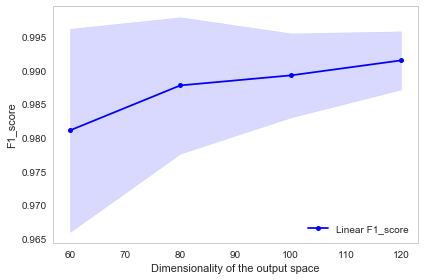

In [75]:
plot_filled(val_scores4, np.arange(60, 140, 20), 'Dimensionality of the output space')

As the pattern of dropout tuning curve is different from that of LSTM, the tuning curve of dimensionality of the output space in GRU is expected to be different as well. The curve above has a totally opposite trend of that of dropout in GRU. As the increasing of the dimensionality of the output space, the f1 score become higher with lower variance. With a fixed dropout value - 0.3, we see that increase of the number/size of filters will lead to a good result. It is possible the original GRU model avoid the overfitting problem very well so it need to make the model complex enough to learn from the training data.

### 2.2 Comparison of Different Recurrent Networks

In [82]:
scores1 = []
y_test_lstm = []
yhat_lstm = []

for train_index, test_index in cv_outerloop.split(X, y_ohe):
    X_train, X_test = X[train_index], X[test_index]
    y_train_ohe, y_test_ohe = y_ohe[train_index], y_ohe[test_index]
    
    rnn_lstm = create_LSTM(embedding_layer, size = 80, drop = 0.3, re_drop = 0.3)
    rnn_lstm.fit(X_train, y_train_ohe, epochs = 5, batch_size=64, verbose = 0)

    yhat = np.argmax(rnn_lstm.predict(X_test),axis=1)
    
    scores1.append(f1(np.argmax(y_test_ohe,axis=1), yhat))
    
    for val in zip(y_test_ohe, yhat):
        yhat_lstm.append(val[1])
        y_test_lstm.append(val[0])

In [84]:
scores2 = []
y_test_gru = []
yhat_gru = []

for train_index, test_index in cv_outerloop.split(X, y_ohe):
    X_train, X_test = X[train_index], X[test_index]
    y_train_ohe, y_test_ohe = y_ohe[train_index], y_ohe[test_index]
    
    rnn_gru = create_GRU(embedding_layer, size = 120, drop = 0.1, re_drop = 0.1)
    rnn_gru.fit(X_train, y_train_ohe, epochs = 5, batch_size=64, verbose = 0)
    yhat = np.argmax(rnn_gru.predict(X_test),axis=1)
    
    scores2.append(f1(np.argmax(y_test_ohe,axis=1), yhat))
    
    for val in zip(y_test_ohe, yhat):
        yhat_gru.append(val[1])
        y_test_gru.append(val[0])

95% CI for the mean F1_score for LSTM is 0.98997070004 +- 0.00627035422783
95% CI for the mean F1_score for GRU is 0.99448297274 +- 0.00165231341032


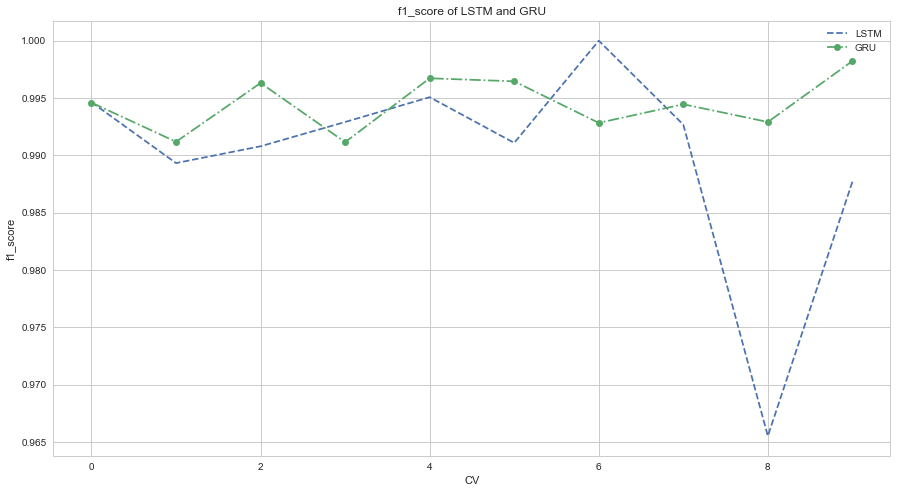

In [86]:
lstm_score = np.array(scores1)
print('95% CI for the mean F1_score for LSTM is', lstm_score.mean(), '+-', 2.26/10**0.5*lstm_score.std())
gru_score = np.array(scores2)
print('95% CI for the mean F1_score for GRU is', gru_score.mean(), '+-', 2.26/10**0.5*gru_score.std())

plt.figure(figsize= (15,8))
plt.plot(lstm_score, label='LSTM', linestyle = '--')
plt.plot(gru_score, label='GRU', linestyle='-.', marker='o')
plt.legend(loc='best')
plt.title('f1_score of LSTM and GRU')
plt.xlabel('CV')
plt.ylabel('f1_score')
plt.show()

From the overall performance, the GRU model achieves a higher f1 score with a lower variance but both of them did a very good job! Their f1 scores approach to 1 to some degree. In specific, the LSTM has a mean f1 score at 0.990 with around 2.5% fluctuation while GRU has a mean f1 at 0.995 with around 0.5% fluctuation. It seems that GRU did better than LSTM but we still need to do a statistical test to see whether they perform differently.

In [87]:
#to calculate the difference between two F-1 scores and get its CI
lstm_gru_dif = lstm_score - gru_score

print('95% confidence Interval for "f1_dif":',np.mean(lstm_gru_dif)-2.26/10**0.5*np.std(lstm_gru_dif),
                                              np.mean(lstm_gru_dif)+2.26/10**0.5*np.std(lstm_gru_dif))

95% confidence Interval for "f1_dif": -0.0108261207301 0.00180157533078


As the zero is include the 95% confidence interval, then we are 95% certain that the GRU and LSTM are the same.

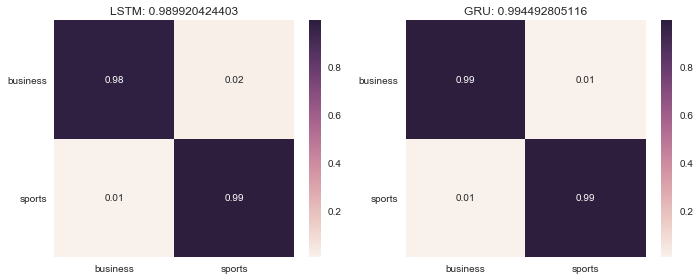

In [96]:
categories = ['business','sports']
categories_y = ['sports', 'business']

plt.figure(figsize=(10,4))

f1_lstm = f1(np.argmax(y_test_lstm,axis=1), yhat_lstm)
plt.subplot(1,2,1)
cm = mt.confusion_matrix(np.argmax(y_test_lstm,axis=1), yhat_lstm)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('LSTM: '+ str(f1_lstm))
tick_marks = np.arange(0.5, 2)
plt.xticks(tick_marks, categories, rotation = 0)
plt.yticks(tick_marks, categories_y, rotation = 0)

f1_gru = f1(np.argmax(y_test_gru,axis=1), yhat_gru)
plt.subplot(1,2,2)
cm = mt.confusion_matrix(np.argmax(y_test_gru,axis=1), yhat_gru)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('GRU: '+ str(f1_gru))
tick_marks = np.arange(0.5, 2)
plt.xticks(tick_marks, categories, rotation = 0)
plt.yticks(tick_marks, categories_y, rotation = 0)
plt.tight_layout()
plt.show()

The confusion matrix shows a good result as their f1 score shows - both the false positive and false negative are low. The false positive of LSTM is sligtly (their overall performance is the same as the statsitical test told) bigger than that in GRU possibly due to the dropout containing some information helpful to classify the business class. The misclassifications are possible the cases that involves football lottery, investment of sport company, etc.

<a id="ExceptionalWork"></a>
## 3. Exceptional Work

### 3.1 Visualize and interpret the Embedding layer weights

In [25]:
#make the embedding_layer trainable
embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],
                            input_length=MAX_ART_LEN,
                            trainable=True)

In [27]:
#take one 20-80% split as an example to visualize and interpret 
cv_outerloop1 = ShuffleSplit(n_splits = 1, test_size  = 0.2, random_state = 42)
for train_index, test_index in cv_outerloop1.split(X, y_ohe):
    X_train, X_test = X[train_index], X[test_index]
    y_train_ohe, y_test_ohe = y_ohe[train_index], y_ohe[test_index]

gru = create_GRU(embedding_layer, size = 120, drop = 0.1, re_drop = 0.1)
summary = gru.fit(X_train, y_train_ohe, epochs = 5, batch_size=64, verbose = 0)
yhat = np.argmax(gru.predict(X_test),axis=1)

In [277]:
score = np.array(f1(np.argmax(y_test_ohe,axis=1), yhat))
print('95% CI for the mean F1_score for LSTM is', score.mean(), '+-', 2.26/10**0.5*score.std())

95% CI for the mean F1_score for LSTM is 0.996402877698 +- 0.0


In [29]:
#visualize the embedding layer weights
embedding_layer.get_weights()

[array([[  1.48851017e-03,   1.88752997e-03,  -7.94560555e-03, ...,
          -8.75849556e-03,  -9.53598123e-04,  -3.73998168e-03],
        [ -1.29381850e-01,  -4.55489516e-01,   3.26991268e-02, ...,
          -2.93246686e-01,  -4.61070128e-02,   5.63956678e-01],
        [  5.34216940e-01,   9.93062615e-01,   5.57354271e-01, ...,
          -2.43747354e-01,   7.23822951e-01,  -8.57802272e-01],
        ..., 
        [ -1.93680599e-01,   1.10132828e-01,   3.70218426e-01, ...,
           2.66317353e-02,  -6.47765815e-01,   1.65464133e-01],
        [ -8.34210038e-01,   2.54645169e-01,   5.04710674e-01, ...,
           3.23859930e-01,  -2.35291034e-01,   2.02677757e-01],
        [ -1.03902698e+00,  -6.26226544e-01,   9.69607353e-01, ...,
          -1.41595876e+00,   6.82670653e-01,  -2.93069363e-01]], dtype=float32)]

In [287]:
#extract the weights from the list
arr = embedding_layer.get_weights().pop()
output_matrix = {}

#Select top 2 weights from the matrix to represent each word in 2-D dimensions
for word, i in word_index.items():
    output_matrix[word] = (sorted(abs(arr[i]), reverse = True)[1], sorted(abs(arr[i]), reverse = True)[0])

To better interpret the embedding weights, we manually select common words in both categories, and plot to the scatterplot with labels, which is more straighforward to observe any obvious patterns, especially the boundary between two categories

/Users/wangsimin/anaconda/lib/python3.6/site-packages/matplotlib/text.py:2138: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


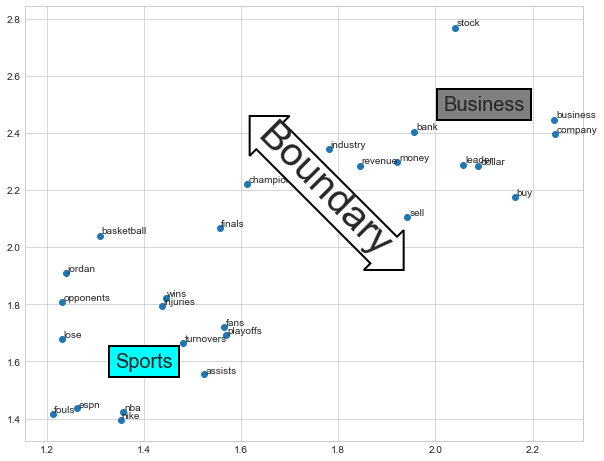

In [410]:
x=[]
y=[]
n=['assists', 'jordan', 'fans', 'champion', 'basketball', 'nba', 'playoffs', 'espn',
   'money', 'dollar', 'industry', 'stock', 'business', 'leader', 'wins', 'lose', 'buy', 'sell',
   'revenue', 'opponents', 'company', 'bank', 'finals', 'fouls', 'injuries','turnovers','nike']

#for key in output_matrix.keys():
for key in n:
    x.append(output_matrix.get(key)[0])
    y.append(output_matrix.get(key)[1])

fig, ax = plt.subplots(figsize = (10, 8))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), textcoords='offset points')

bbox_props = dict(boxstyle="square,pad=0.3", fc="cyan", lw=2)
t = ax.text(1.4, 1.6, "Sports", ha="center", va="center", 
            size=20,
            bbox=bbox_props)

bbox_props1 = dict(boxstyle="square,pad=0.3", fc="gray", lw=2)
v = ax.text(2.1, 2.5, "Business", ha="center", va="center", 
            size=20,
            bbox=bbox_props1)

bbox_props2 = dict(boxstyle="darrow, pad=0.02", fc="w", lw=2)
v = ax.text(1.77, 2.2, "Boundary", ha="center", va="center", 
            size=40, rotation = -45,
            bbox=bbox_props2)

From the figure above, we can tell that an explicit boundary exists, which somewhat explains why our prediction result is pretty well. For the sports field, we select most of words associated with NBA closely, such as turnovers, assists, playoffs. The Euclidean distance among those words are quite short. On the other hand, business-relate words, including bank, money, sell, etc., are relatively easy to tell apart from sports field according to the above figure. However, some possible outliers appear near the boundary, which should have some strong indication of either side, such as champion and finals. We expect them to be classified to the sports, but they tend to be neutral. Anyway, it's an overall success plotting in 2-D dimensions since we only pick top 2 absolute values from 100 weights.

In order to evaluate the general performance of the embedding layer not just some specific words, we continue to do some further analysis with the help of a clustering algorithm, KMeans. All the 25423 words have been divided into two clusters based on the Euclidean distance of embedding weights. Due to the fact that they don't have the labels yet, we could manually inspect whether the produced clusters make sense or not.

In [426]:
from sklearn.cluster import KMeans

#K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(arr[1:])

In [456]:
df_word = pd.DataFrame(arr[1:])
df_word['cluster'] = kmeans.labels_
df_word['word'] = word_index.keys()
df_word.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,cluster,word
0,-0.129382,-0.455490,0.032699,-0.990841,-0.209962,-0.954827,-0.237487,0.484799,0.193015,0.478940,...,0.293020,0.136987,-0.705674,0.682339,-0.082912,-0.293247,-0.046107,0.563957,0,said
1,0.534217,0.993063,0.557354,0.137264,0.010335,-1.004129,0.392430,0.301730,0.031882,0.499912,...,-0.014363,-0.262167,-2.110444,0.421383,-0.271999,-0.243747,0.723823,-0.857802,0,percent
2,-0.969962,0.544759,0.825140,0.075412,0.150572,-0.442973,-0.941110,0.534278,-0.530589,1.241648,...,-0.627446,-0.477249,-0.666200,0.693144,0.648425,0.284592,-0.018369,0.248380,0,pakistan
3,0.440817,0.479826,0.361195,-0.528031,0.205644,-0.459665,0.614833,0.730416,-0.410607,0.151560,...,-0.425150,-0.077338,-0.855268,0.282422,0.084745,0.380585,0.486759,-0.659764,0,year
4,-0.030807,0.032411,0.331600,0.157038,0.106465,0.098764,0.794199,0.219525,-0.582132,-0.066295,...,-0.189120,0.328762,-0.753963,-0.079101,-0.193042,0.066404,0.281800,-0.301972,0,first


In [455]:
df_word.groupby(['cluster']).size().reset_index(name='counts')

,cluster,counts
0,0,10250
1,1,15173


From the result, two clusters are generated, cluster 0 and 1. And there isn't a great imbalance between two clusters.

In [452]:
df_word[df_word.cluster == 0].word.values[:200]

array(['said', 'percent', 'pakistan', 'year', 'first', 'strong', 'world',
       'oil', 'two', 'also', 'last', 'new', 'one', 'england', 'would',
       'us', 'three', 'million', 'cricket', 'test', 'prices', 'team',
       'day', 'match', 'india', 'second', 'time', 'market', 'billion',
       'week', 'four', 'crude', 'international', 'since', 'made', 'could',
       'captain', 'country', 'month', 'government', 'bank', 'china',
       'global', 'years', 'friday', 'added', 'minister', 'runs', 'monday',
       'five', 'final', 'back', 'series', 'u', 'south', 'ball', 'top',
       'dollar', 'australia', 'six', 'markets', 'thursday', 'told',
       'tuesday', 'growth', 'wickets', 'wednesday', 'west', 'economic',
       'united', 'per', 'next', 'trade', 'sri', 'play', 'well', 'game',
       'win', 'left', 'economy', 'high', 'set', 'players', 'third',
       'lanka', 'group', 'fell', 'islamabad', 'old', 'balls', 'side',
       'run', 'innings', 'energy', 'production', 'took', 'ali', 'earlier',

From the top 200 words of cluster 0, we could observe some business-sensitive words, such as government, bank, minister, growth, federal, policy, economy, etc.. So cluster 0 should be labeled as indicators of Business.

In [453]:
df_word[df_word.cluster == 1].word.values[:200]

array(['rs', 'wicket', 'br', 'overs', 'mohammad', 'th', 'amir',
       'strongthe', 'bowler', 'brent', 'spinner', 'fours', 'batsman',
       'pcb', 'toss', 'trump', 'sixes', 'afridi', 'lahore', 'bowled',
       'batsmen', 'bowlers', 'dar', 'unbeaten', 'misbah', 'messi', 'wti',
       'shahid', 'odi', 'nawaz', 'bairstow', 'glut', 'ul', 'haq', 'kohli',
       'ronaldo', 'hales', 'singh', 'stokes', 'rounder', 'skipper', 'fbr',
       'sharif', 'ishaq', 'riaz', 'wahab', 'sindh', 'iqbal', 'hafeez',
       'younis', 'internationals', 'wk', 'azhar', 'woakes', 'peshawar',
       'sbp', 'djokovic', 'kolkata', 'quetta', 'mathews', 'williamson',
       'zalmi', 'cpec', 'yasir', 'dhoni', 'gladiators', 'strategist',
       'shoaib', 'sarfraz', 'oversupply', 'brexit', 'malik', 'xi',
       'wicketkeeper', 'paceman', 'bcci', 'litre', 'alastair', 'sohail',
       'villiers', 'sharapova', 'punjab', 'darren', 'psl', 'com', 'asif',
       'bravo', 'pacer', 'modi', 'spinners', 'hasan', 'sammy', 'sami',
  

For the cluster 1, many sports-related words appear inside the cluster, especially the soccer field, such as lionel messi, cristiano ronaldo, goalkeeper, header, midfielder. A famous tennis player showed up as well, novak djokovic. Therefore, we have strong confidence that cluster 1 could be labeled as indicators of Sports.

### 3.2 comparison between different different accuracy on 20 news data

In original posting by the Keras blog, they get about 95% accuracy within 2 epoches. However, in the CNN model we learn in class, the accuracy approach 83% after 10 epoches. The question arises, why there is a difference?

We compare the data used as well as the models and find that for most part of the models, they are pretty the same. Only several possible difference exist, which may lead to the difference. 

First, even though we both use 20 groups news data, we get it from diffferent ways. One of them is from sklearn.datasets and the other from local dataset. 

Second, in the class model, Dr.Larson uses all text data while in the keras model they delete headers by setting header = NONE.

Third, in the class model, Dr.Larson uses stratify split to split data for cross validation while in the keras model, they use shuffle split.

Lastly, in the class model, Dr.Larson set kernel_initializer for DENSE layer while in the keras model they leave it as default.

To find the reason, the control variable method is adopted. We rerun the keras model several times and only keep one difference in the model  each time. The second and fourth difference do not seem to influence accuracy much. We believe that the data itself and the way we split it are the reason why we can not get 95% accuracy as keras model does.

<a id="References"></a>
## References

[1] News Articles Homepag. URL: https://www.kaggle.com/asad1m9a9h6mood/news-articles